# Modelos de clasificación para la variable **ld** (Deflactor espacial) de la ENAHO para los años 2004-2011

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
usuario = os.getlogin()

## Training

Importamos el primer .csv que guardamos con STATA

In [2]:
df = pd.read_csv("/Users/"+usuario+"/Desktop/data12-21.csv", encoding="ANSI")

In [3]:
df.head()

,aÑo,ubigeo,ld,dept,prov,estrato
0,2012,10101,0.815806,1,101,4
1,2012,10101,0.815806,1,101,4
2,2012,10101,0.815806,1,101,4
3,2012,10101,0.815806,1,101,4
4,2012,10101,0.815806,1,101,4


Los valores de **ld** son float

In [4]:
type(df["ld"][0])

numpy.float64

Convertimos a numéricas las variables regresoras y a string la varible explicada

In [5]:
df1 = pd.DataFrame({"ubigeo": pd.to_numeric(df["ubigeo"]),
                   "dept": pd.to_numeric(df["dept"]),
                   "estrato": pd.to_numeric(df["estrato"]),
                    "ld": df["ld"].astype(str)
                   })
df1

,ubigeo,dept,estrato,ld
0,10101,1,4,0.81580621
1,10101,1,4,0.81580621
2,10101,1,4,0.81580621
3,10101,1,4,0.81580621
4,10101,1,4,0.81580621
...,...,...,...,...
329706,250104,25,8,0.95415074
329707,250104,25,8,0.95415074
329708,250104,25,8,0.95415074
329709,250104,25,8,0.95415074


Text(0, 0.5, 'deflactor espacial')

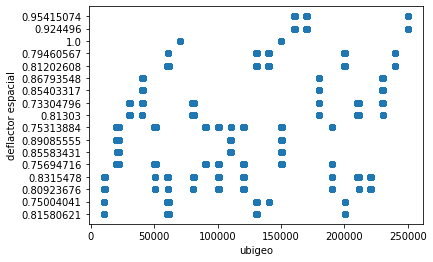

In [6]:
plt.scatter(df1["ubigeo"], df1["ld"])
plt.xlabel("ubigeo")
plt.ylabel("deflactor espacial")

Text(0, 0.5, 'deflactor espacial')

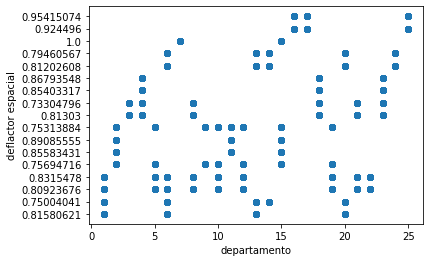

In [7]:
plt.scatter(df1["dept"], df1["ld"])
plt.xlabel("departamento")
plt.ylabel("deflactor espacial")

Text(0, 0.5, 'deflactor espacial')

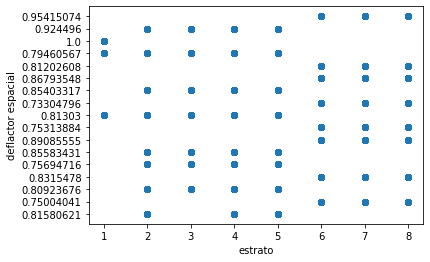

In [8]:
plt.scatter(df1["estrato"], df1["ld"])
plt.xlabel("estrato")
plt.ylabel("deflactor espacial")

Generamos un nuevo dataframe que contenga a las variables regresoras de nuestros futuros modelos (**ubigeo**, **departamento** y **estrato**).

In [9]:
x = df1[["ubigeo", "dept", "estrato"]]
x

,ubigeo,dept,estrato
0,10101,1,4
1,10101,1,4
2,10101,1,4
3,10101,1,4
4,10101,1,4
...,...,...,...
329706,250104,25,8
329707,250104,25,8
329708,250104,25,8
329709,250104,25,8


Generamos un dataframe que contenga a la variable explicada de nuestros futuros modelos (**deflactor espacial**).

In [10]:
y = df1["ld"]
y

0         0.81580621
1         0.81580621
2         0.81580621
3         0.81580621
4         0.81580621
             ...    
329706    0.95415074
329707    0.95415074
329708    0.95415074
329709    0.95415074
329710    0.95415074
Name: ld, Length: 329711, dtype: object

Ocurrencias para cada valor de **ld**.

In [11]:
y.value_counts()

1.0           39141
0.79460567    36310
0.75313884    35500
0.73304796    25649
0.85583431    24628
0.75694716    23202
0.81303       21655
0.924496      20379
0.8315478     20216
0.85403317    17853
0.80923676    15408
0.75004041    14901
0.95415074    11191
0.81202608     8857
0.81580621     6668
0.89085555     5212
0.86793548     2941
Name: ld, dtype: int64

Importamos algunas librerías útiles y definimos una función que nos ayude a graficar las matrices de confusión.

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.ticker import FuncFormatter

fmt = lambda x,pos: '{:.0%}'.format(x)

def plot_conf_mat(conf_mat, title, title2=""):
    fig, axes = plt.subplots(2, 1, figsize=(14, 16))
    fig.suptitle("Confusion Matrix for " + title + " Classifier" + title2, y=0.92)

    sns.heatmap(conf_mat, ax=axes[0], annot=True, fmt='g',
               cmap="Blues")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title("At variable level (units)")

    sns.heatmap(conf_mat/np.sum(conf_mat), ax=axes[1], annot=True, fmt='.1%',
                cmap="Blues", cbar_kws={'format': FuncFormatter(fmt)})
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].set_title("In percentage")

#### 1. Regresión Logística

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression()
lr_model.fit(x, y)
lr_model.score(x, y)

0.11012674736360024

In [15]:
y_lr_pred = lr_model.predict(x)
cm_lr = confusion_matrix(y, y_lr_pred)

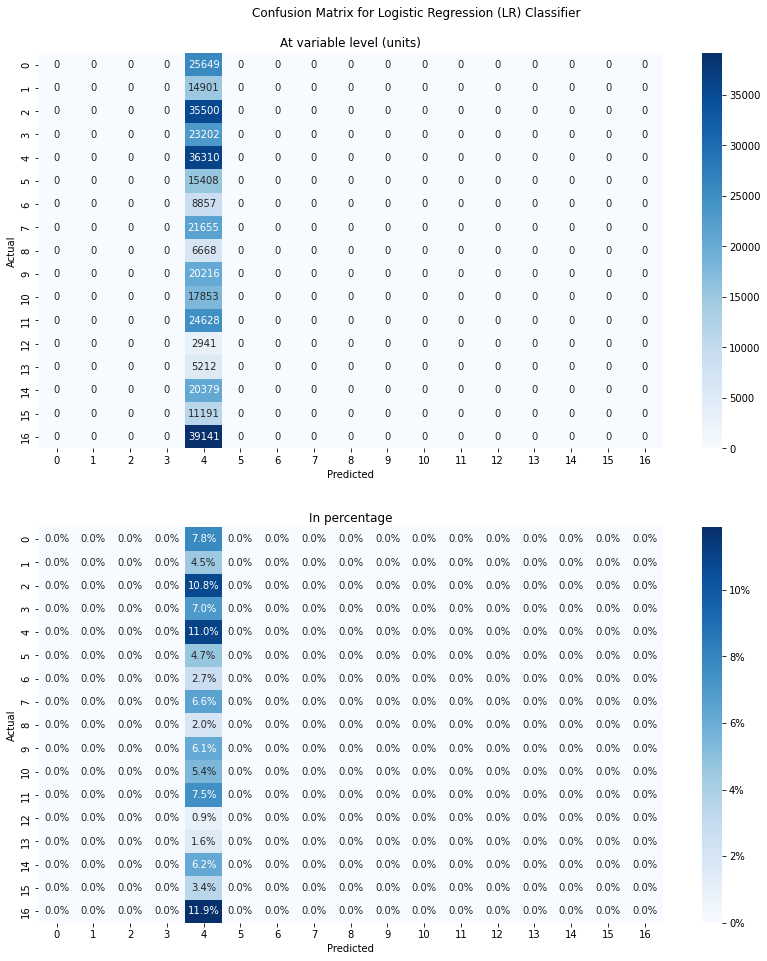

In [16]:
plot_conf_mat(cm_lr, "Logistic Regression (LR)")

El modelo de regresión logística predice siempre la misma clase.

#### 2. Árbol de decisión

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x, y)
dt_model.score(x, y)

0.9971641831786019

In [19]:
y_dt_pred = dt_model.predict(x)
cm_dt = confusion_matrix(y, y_dt_pred)

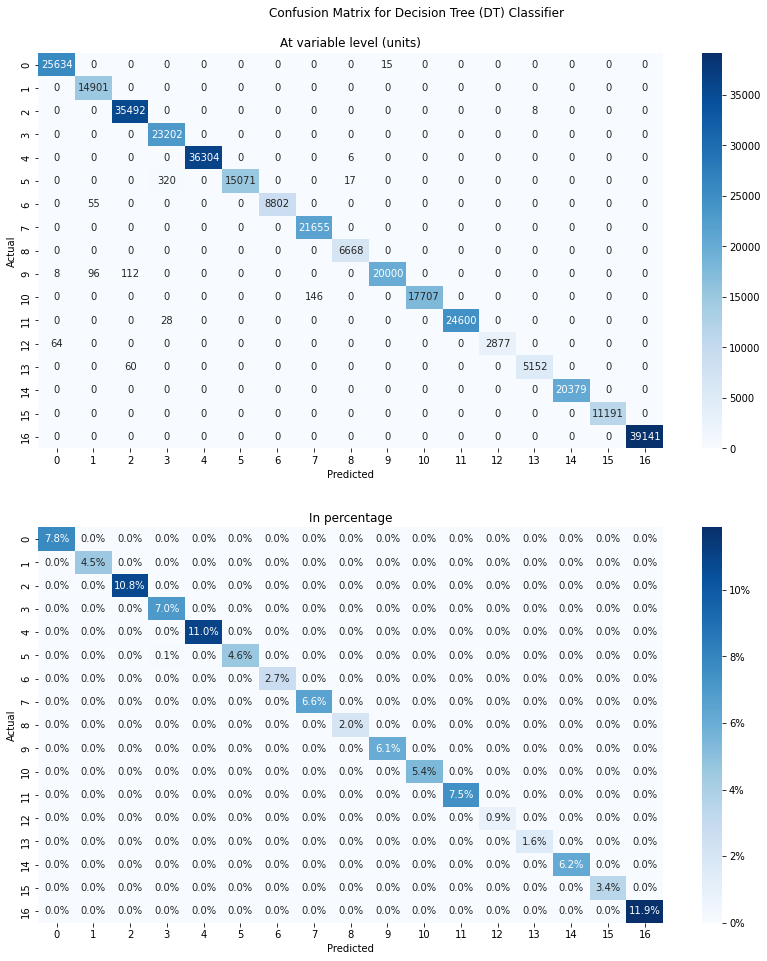

In [20]:
plot_conf_mat(cm_dt, "Decision Tree (DT)")

El modelo de árbol de decisión tiene 99.71% de precisión.

#### 3. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(x, y)
rf_model.score(x, y)

0.9971641831786019

In [23]:
y_rf_pred = rf_model.predict(x)
cm_rf = confusion_matrix(y, y_rf_pred)

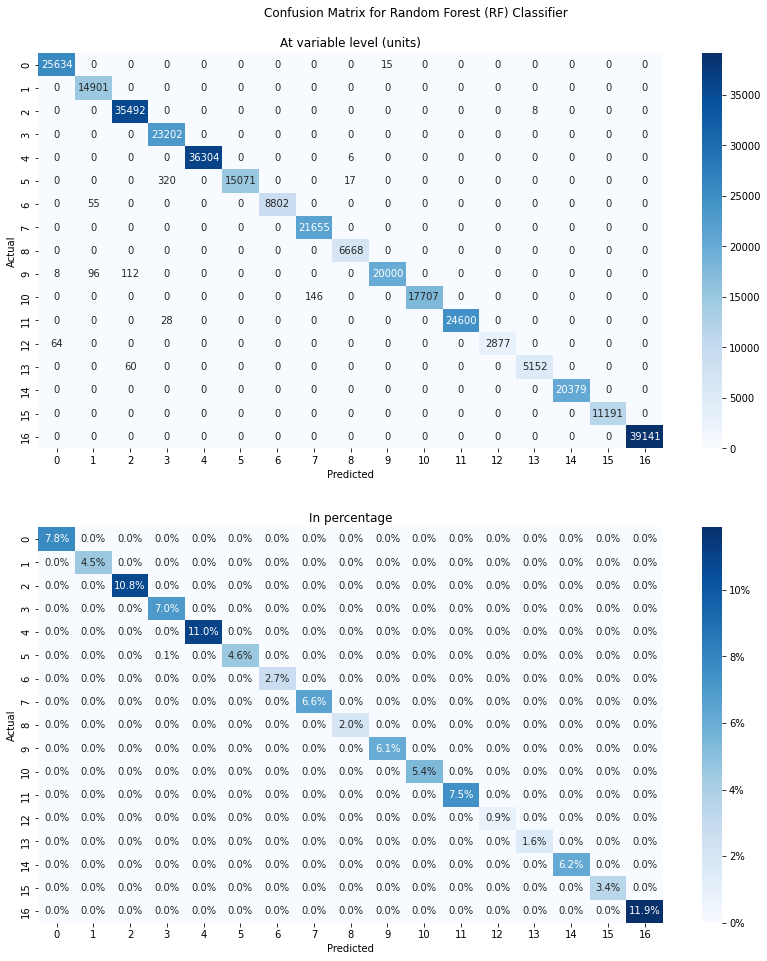

In [24]:
plot_conf_mat(cm_rf, "Random Forest (RF)")

El modelo de Random Forest tiene 99.71% de precisión, igualmente.

#### 4. Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
xg_model = GradientBoostingClassifier()
xg_model.fit(x, y)
xg_model.score(x, y)

0.9933123250361681

In [28]:
y_xg_pred = xg_model.predict(x)
cm_xg = confusion_matrix(y, y_xg_pred)

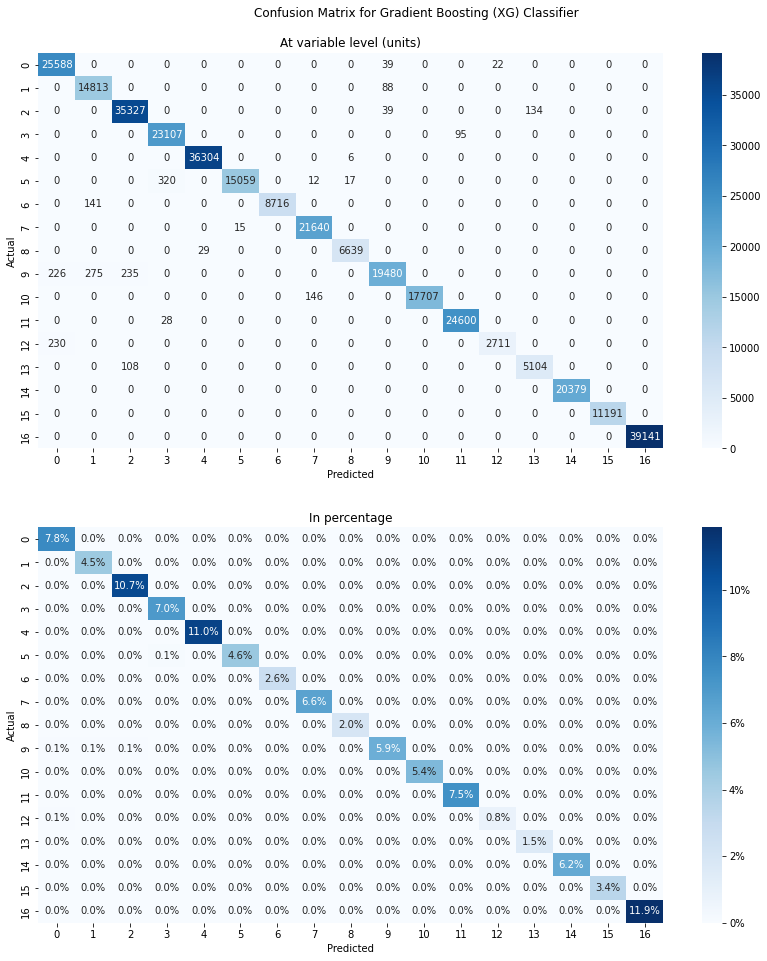

In [29]:
plot_conf_mat(cm_xg, "Gradient Boosting (XG)")

El modelo de Random Forest tiene 99.33% de precisión.

Reunimos las precisiones obtenidas en una lista:

In [30]:
acc_train = [dt_model.score(x, y), rf_model.score(x, y), xg_model.score(x, y)]

## Testing

Abrimos el segundo dataset que generamos con STATA (con los valores de **def_es** añadidos).

In [31]:
df_ = pd.read_csv("/Users/"+usuario+"/Desktop/data04-11_Ld.csv", encoding="ANSI")
df_

,aÑo,ubigeo,dept,prov,estrato,def_es
0,2004,10101,1,101,4,0.815806
1,2004,10101,1,101,4,0.815806
2,2004,10101,1,101,4,0.815806
3,2004,10201,1,102,4,0.809237
4,2004,10201,1,102,4,0.809237
...,...,...,...,...,...,...
171733,2011,40605,4,406,7,0.733048
171734,2011,90714,9,907,8,0.753139
171735,2011,30401,3,304,8,0.733048
171736,2011,230401,23,2304,7,0.733048


In [32]:
df2 = pd.DataFrame({"ubigeo": pd.to_numeric(df_["ubigeo"]),
                    "dept": pd.to_numeric(df_["dept"]),
                    "estrato": pd.to_numeric(df_["estrato"]),
                    "def_es": df_["def_es"].astype(str)
                   })
df2

,ubigeo,dept,estrato,def_es
0,10101,1,4,0.81580621
1,10101,1,4,0.81580621
2,10101,1,4,0.81580621
3,10201,1,4,0.80923676
4,10201,1,4,0.80923676
...,...,...,...,...
171733,40605,4,7,0.73304796
171734,90714,9,8,0.75313884
171735,30401,3,8,0.73304796
171736,230401,23,7,0.73304796


In [33]:
# df_.rename(columns = {'estrato_':'estrato'}, inplace = True)
x_ = df2[["ubigeo", "dept", "estrato"]]
x_

,ubigeo,dept,estrato
0,10101,1,4
1,10101,1,4
2,10101,1,4
3,10201,1,4
4,10201,1,4
...,...,...,...
171733,40605,4,7
171734,90714,9,8
171735,30401,3,8
171736,230401,23,7


In [34]:
y_ =  df2["def_es"]
y_

0         0.81580621
1         0.81580621
2         0.81580621
3         0.80923676
4         0.80923676
             ...    
171733    0.73304796
171734    0.75313884
171735    0.73304796
171736    0.73304796
171737    0.73304796
Name: def_es, Length: 171738, dtype: object

Con los modelos anteriormente entrenados calculamos la precisión con los nuevos datos y los reunimos en una lista:

In [35]:
acc_test = [dt_model.score(x_, y_), rf_model.score(x_, y_), xg_model.score(x_, y_)]

In [36]:
df_accuracy = pd.DataFrame({"Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
                            "Accuracy Train (2012-2021)": acc_train,
                            "Accuracy Test (2004-2011)": acc_test
                           })
df_accuracy

,Model,Accuracy Train (2012-2021),Accuracy Test (2004-2011)
0,Decision Tree,0.997164,0.993455
1,Random Forest,0.997164,0.988156
2,Gradient Boosting,0.993312,0.989414


Observamos que el mejor modelo es el de árbol de decisión, por lo que lo usamos para realizar predicciones con la data nueva (2004-2011)

In [37]:
prediccion_dt = dt_model.predict(x_)
cm_dt_ = confusion_matrix(y_, prediccion_dt)

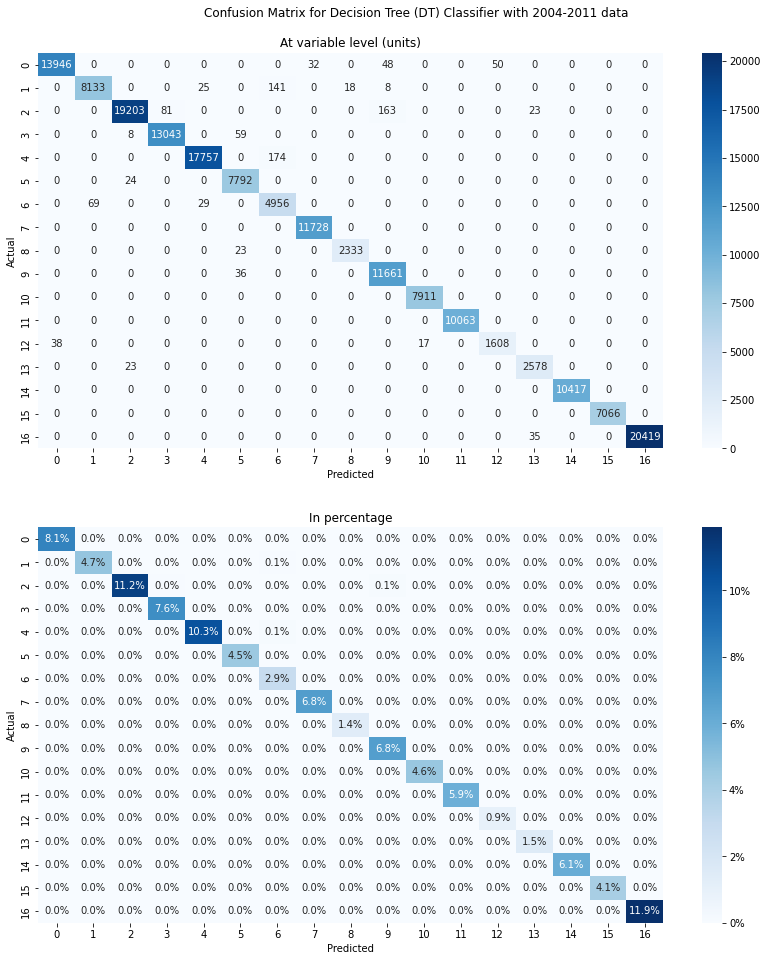

In [38]:
plot_conf_mat(cm_dt_, "Decision Tree (DT)", title2=" with 2004-2011 data")

In [39]:
df1["def_est_dt"] = y_dt_pred
df1["aÑo"] = df["aÑo"]
df1.shape

(329711, 6)

Obtenemos las instancias (filas) de los valores que no coinciden con los estimados (errores) para el primer dataset (2012-2021) que nos sirvió de entrenamiento

In [40]:
df1_errores = df1.loc[df1["ld"] != df1["def_est_dt"]]
df1_errores

,ubigeo,dept,estrato,ld,def_est_dt,aÑo
5263,80908,8,7,0.73304796,0.8315478,2012
5264,80908,8,7,0.73304796,0.8315478,2012
5265,80908,8,7,0.73304796,0.8315478,2012
5266,80908,8,7,0.73304796,0.8315478,2012
5267,80908,8,7,0.73304796,0.8315478,2012
...,...,...,...,...,...,...
328994,151023,15,6,0.89085555,0.75313884,2021
328995,151023,15,6,0.89085555,0.75313884,2021
328996,151023,15,6,0.89085555,0.75313884,2021
328997,151023,15,6,0.89085555,0.75313884,2021


In [41]:
df2["def_est_dt"] = prediccion_dt
df2["aÑo"] = df_["aÑo"]
df2.shape

(171738, 6)

Obtenemos las instancias (filas) de los valores que no coinciden con los estimados (""errores"") para el segundo dataset (2004-2011) que nos sirvió: 1. De comprobación (testeo) del modelo y 2. De comprobación con los valores de def_es estimados manualmente

In [42]:
df2_errores = df2.loc[df2["def_es"] != df2["def_est_dt"]]
df2_errores

,ubigeo,dept,estrato,def_es,def_est_dt,aÑo
628,40121,4,8,0.73304796,0.86793548,2004
629,40121,4,8,0.73304796,0.86793548,2004
630,40121,4,8,0.73304796,0.86793548,2004
631,40121,4,8,0.73304796,0.86793548,2004
632,40121,4,8,0.73304796,0.86793548,2004
...,...,...,...,...,...,...
160747,80908,8,7,0.73304796,0.8315478,2011
163244,80908,8,7,0.73304796,0.8315478,2011
164567,80908,8,7,0.73304796,0.8315478,2011
168924,211210,21,7,0.73304796,0.8315478,2011


Podemos observar en df_accuracy cuáles son los mejores modelos de predicción para este caso.

In [43]:
df_accuracy

,Model,Accuracy Train (2012-2021),Accuracy Test (2004-2011)
0,Decision Tree,0.997164,0.993455
1,Random Forest,0.997164,0.988156
2,Gradient Boosting,0.993312,0.989414
